# Information Structures and Implications - Jolan Wuyts

## Homework #1: Creating an ER model

<b> This is quite a long notebook, since I have written down my thinking process for every step. Here's the completed ER model. My thinking process is described below it, from start to finish. </b>



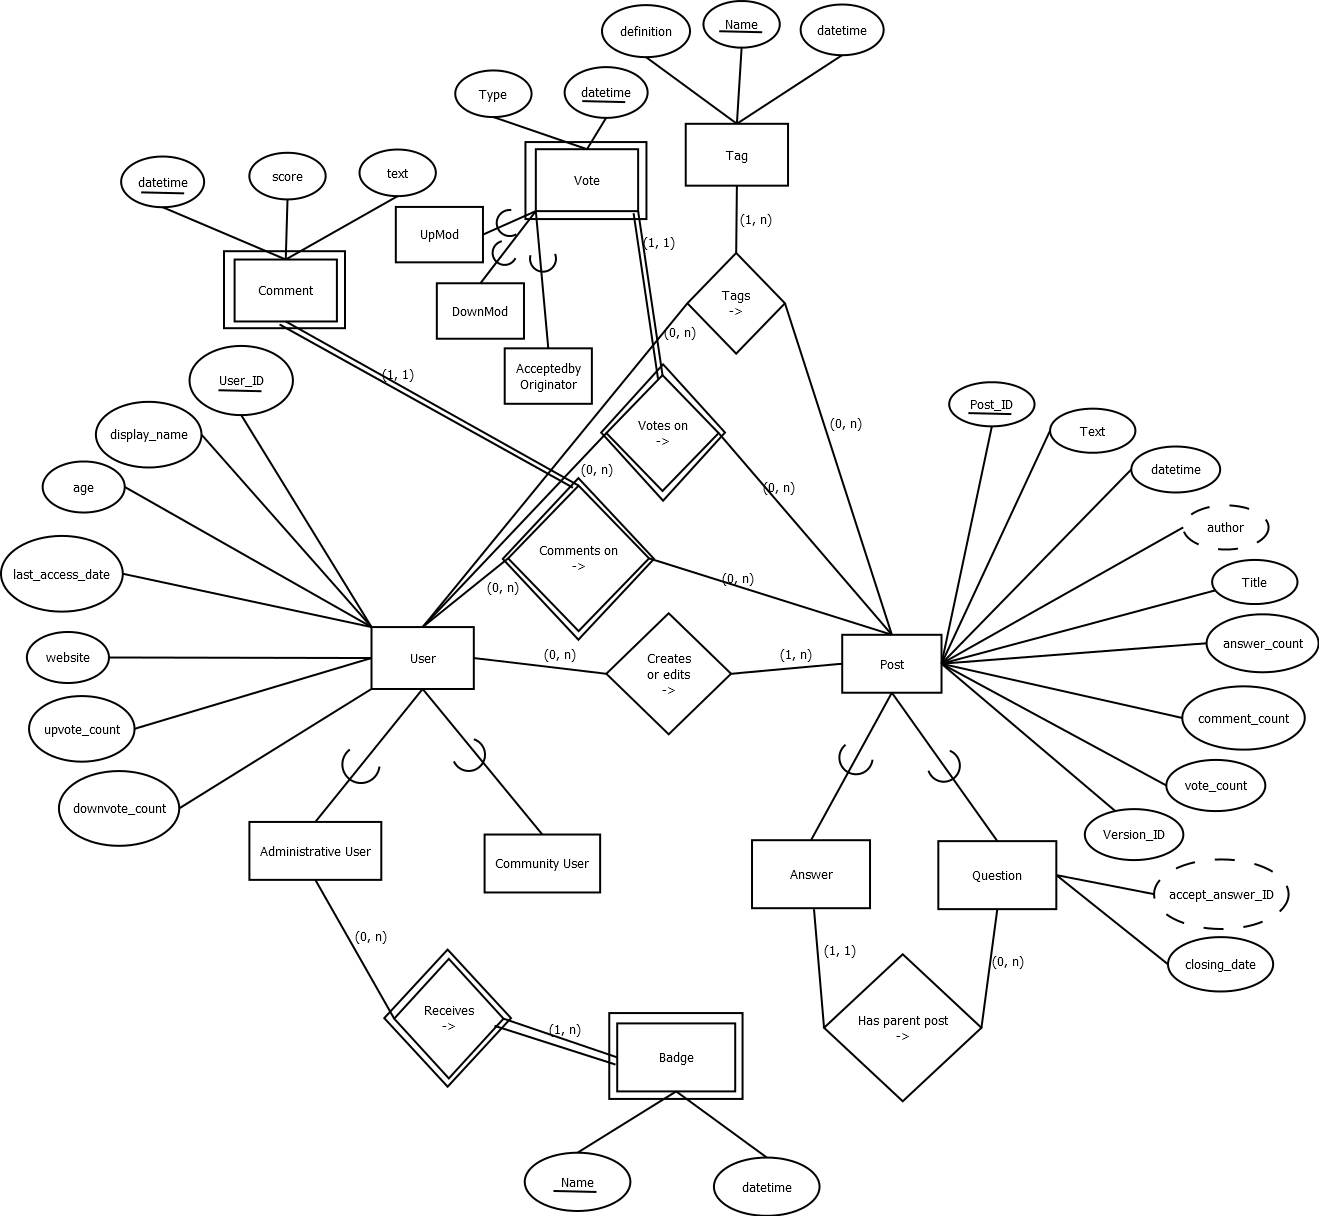

In [12]:
from IPython.display import Image
Image(filename="isi7.png")

So for our first homework assignment we got a description of an
interactive forum where users could post questions and answers, and were given the task to create an ER model in DIA to model the data structures of this forum. Here's the text:

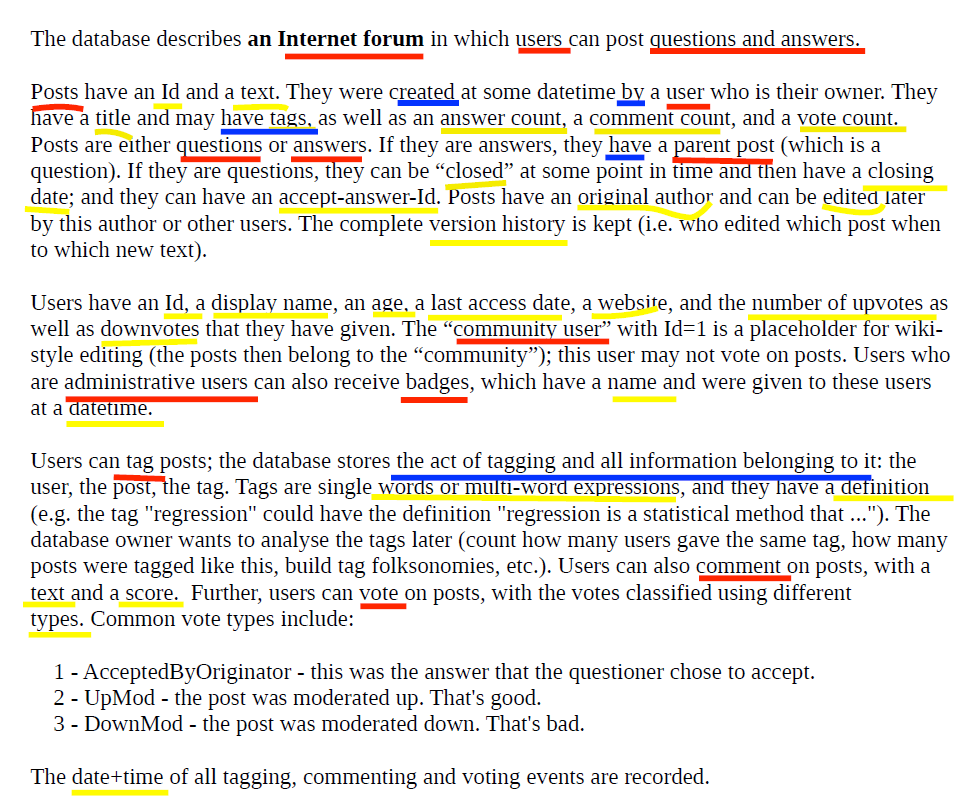

In [13]:
from IPython.display import Image
Image(filename="isi1.png")

### Finding Candidates

You'll see that I already underlined a lot of the keywords needed to form our ER model. Let's list the candidates for entity sets, attributes, and relationships. I have underlined the entity set candidates in red, the attribute candidates in yellow, and the relationship candidates in blue. 

<b>entity set candidates:</b>
* Internet Forum
* User
* Question
* Answer
* Post
* Parent Post
* Community User
* Administrative User
* Badge
* Tag
* Comment
* Vote

<b> Attribute candidates:</b>
* Post ID
* Post text
* Post title
* Post answer count
* Post comment count
* Post vote count
* Post closing date
* Post accept-answer-ID
* Post original author
* Post editor
* Post version history

* User ID
* User display name
* User age
* User last access date
* User website
* User upvote count
* User downvote count

* Badge name
* Badge datetime

* Tag name (word or expression)
* Tag definition
* Tag datetime

* Comment text
* Comment score
* Comment datetime

* Vote type
* Vote datetime

<b> Relationship candidates </b>
* User creates post
* User tags post
* Post has parent Post
* User edits post
* User receives Badge
* User comments on Post
* User votes on Post

### Creating Entity Sets

Judging by the attributes on possible entity sets there seem to be entity sets without any attributes attached to them. So <b> I first created the entity sets which would certainly have attributes: Post, User, Badge, Tag, Comment, and Vote.</b>

This leaves me with 
* Internet Forum
* Question
* Answer
* Parent Post
* Community User
* Administrative User

<b>Internet Forum</b> is, like the European Parliament was in our exercise session, the overarching thing we try to model, and thus shouldn't be an entity set. 
<b>Question and Answer</b> could be entities, but they are better described as properties of a Post. Should they become a subclass of Post, or simply an attribute called 'status' for instance? Every Question is a Post, as is every Answer, but not every Post is a question, or an answer. They also have different attributes, e.g. answers have a parent post and questions have a closing date and an accept-answer-id.So Question and Answer become subclasses of Post. Parent Post should then not be an entity set, but the name of a relationship between the answer and question subclasses. That relationship should then be 'Answer has Parent Post Question' 

I'm then left with <b>Community User and Administrative User.</b> The same could be said here: not all users are community users (of that there's only one), and not all users are administrative users. The only big difference between this and Posts is that every post is either a Question or Answer, and in the User entity set there are users that are neither admins or the community user, they are simply members. Does that mean Question and Answer shouldn't be subclasses, and such a way of modelling is only applicable when there's also for sure entities that only belong to the superclass entity set? I have no idea. i'll model Admin and Community user as subclasses of User. A last problem I face with Community User is that if it would be an entity set it would only consist entity, with ID = 1. Is it worth modelling that as a different entity set? I'm going to say yes, because the Community User has different attributes and inner workigs than other members (e.g. it may not vote), and it might be a good idea to keep space to add other community users, if multiple accounts are needed to edit the community posts (maybe community users with different access rights? I might be taking this speculation too far.). 

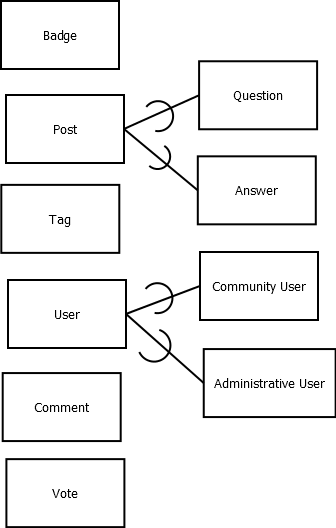

In [14]:
from IPython.display import Image
Image(filename="isi2.png")

### Modelling relationships

Is the correct way to progress to put the attributes to the entity sets first, or do the relationships first? I'll go for the relationships first. It makes it easier to see later on which attributes might be repeated in connected entity sets, so I might avoid having duplicated attributes that could just be seen as derived attributes. 

* User creates post
* User tags post
* Post has parent Post
* User edits post
* User receives Badge
* User comments on Post
* User votes on Post

Some of these are simple enough. <b> User creates post, Admin user receives badge, and Answer post has Parent Post Question Post </b> are easy to model.
Then there's <b>User tags Post, User edits Post, user comments on post, and User votes on Post.</b> These are relationships between a User and a Post, but it makes the User create data as well, and the relationships are already modelled as entity sets, because they have attributes. These attributes only exist in relationship to the User as well as the Post though. A tag cannot exist without a User placing a tag on a post. So should these be multiway relationships? Or should they be single relationships between User and post, with the attributes attached to the relationship?  

((At first I modelled Tags, Votes and Comments as relationships. You'll see that in my second draft I've changed this. My reasoning is in the paragraph 'Revising'. Here's why I first made them relationships:))

Looking back at the slides for the second and third lesson, it seems that a three-way relationship might not fit here. the sentence 'drinkers drink only certain beers at certain bars' does seem to translate to 'users only post certain comments on certain posts'. But it's not <i>certain</i> comments users post on a certain post, the comments they post are always unique. The same comment entity won't be posted to multiple posts. So putting an attribute on the relationship seems more appropriate. 'price is buth a function of the bar and the beer, not of one alone'is applicable to 'comment text is a function of both the user('s comment) and the post, not of one alone'. So voting, commenting, and tagging will become relationships, with their attributes put onto those relationships. 

What then with <b>User edits Post</b>? I would think that's the same as the relationship User creates Post. A user takes part in the same relationship as User creates Post, edits the attributes of Post (by editing the text), and re-creates the edited Post. Right? I'm not sure.

from IPython.display import Image
Image(filename="isi3.png")

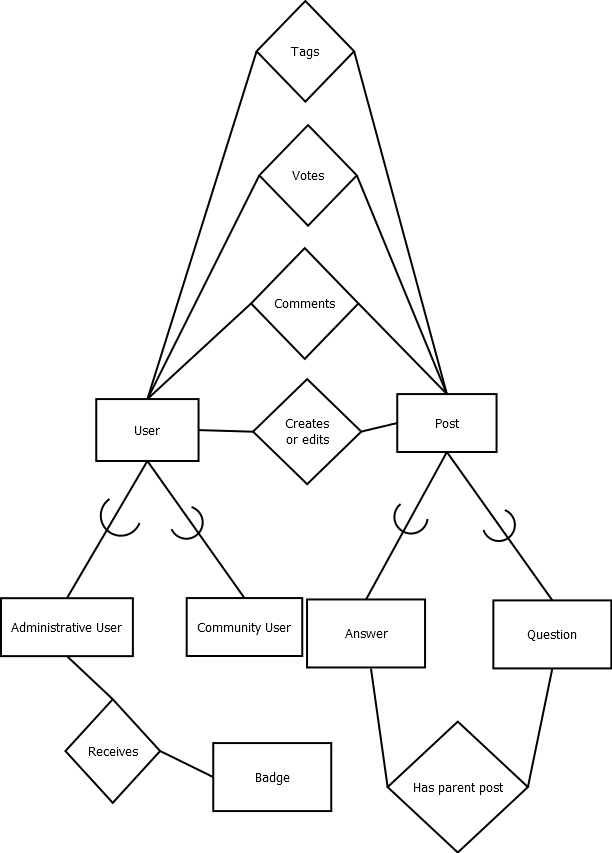

In [15]:
from IPython.display import Image
Image(filename="isi3.png")

### Assigning Attributes

Now, for the attributes. 

* Post ID
* Post text
* Post title
* Post answer count
* Post comment count
* Post vote count
* Post closing date
* Post accept-answer-ID
* Post original author
* Post editor
* Post version history

* User ID
* User display name
* User age
* User last access date
* User website
* User upvote count
* User downvote count

* Badge name
* Badge datetime

* Tag name (word or expression)
* Tag definition
* Tag datetime

* Comment text
* Comment score
* Comment datetime

* Vote type
* Vote datetime

Without putting too much thought into what could be right or wrong, here's how the model would look with simply every attribute set to its respective entity set or relationship.

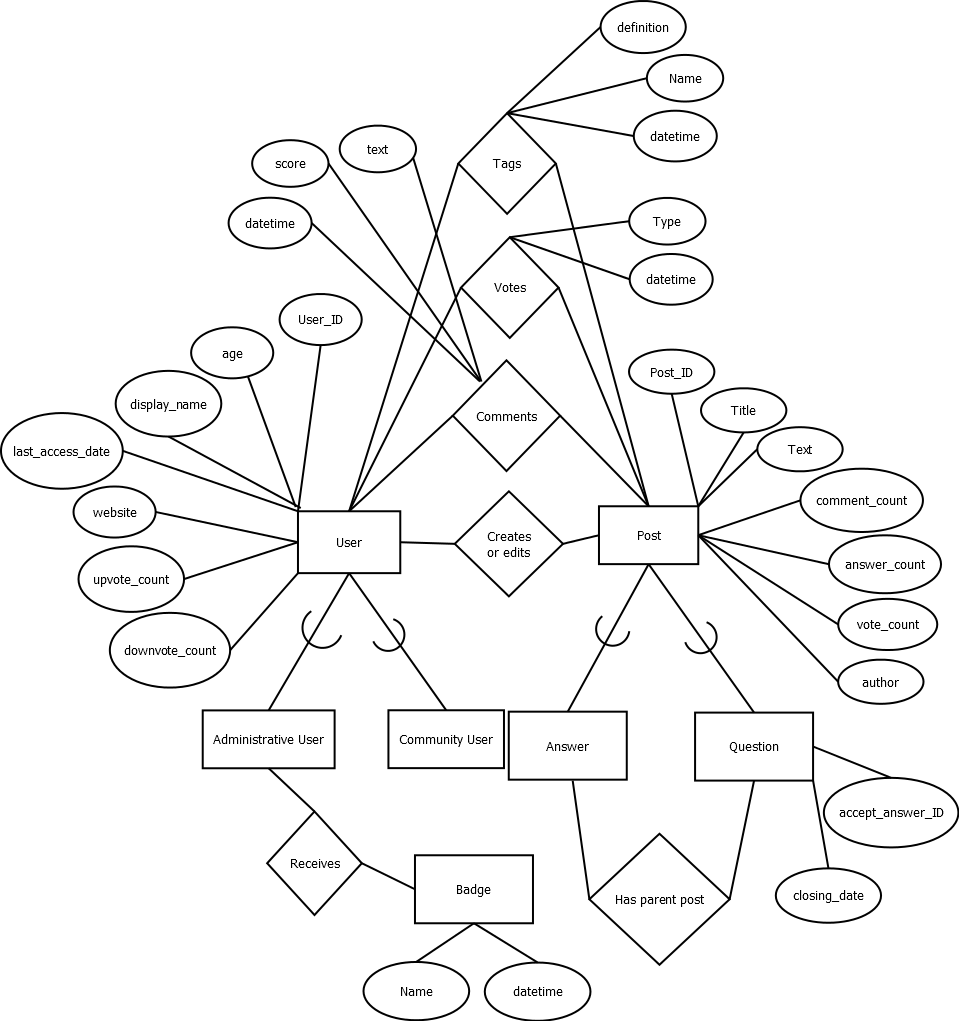

In [16]:
from IPython.display import Image
Image(filename="isi4.png")

### Revising

I'll go over the text once more and see if what is in the text is correctly modelled in this first draft.

The lecture notes have a section about <b>taking attributes away from relationships</b>, and making entity sets for Tag, Vote and Comment now seems like a better way to go. I was thinking about making comment_count and vote_count attributes of the relationships User Comments Post and User Votes Post, but something tells me its better to let them be attributes of Post. 

The first paragraph seems straightforward enough, except for the last lines: 'Posts have an original author and can be edited later by this author or other users. The complete <b>version history</b> is kept.' Does there need to be another attribute to register the version history? Or would it be enough that editing a Post is just taking part in the relation User Creates or Edits Post, thus creating a new entity in the entity set with different values in the attributes?  I think it does work that way. Only the most recent post would show up on the website, but the database would have all the different edits stored, under maybe a second key. The Primary key Post_ID would be attributed to the User who first created the post. Then when the post is edited maybe a version_ID is added, referring to the Post_ID? I'll add an attribute called Version_ID to reflect this.

For the second paragraph, I wasn't sure if things like upvote_count and downvote_count were attributes that were needed. Together with vote_count and the entity set Vote it seems like a lot of redundant information. So maybe vote_count, upvote_count, downvote_count, comment_count, and answer_count are just <b>derived attributes</b>? But they're not exactly the same as other attributes. vote_count is a sum of the amount of times a User has taken part in the relationship User votes Post. There's no other attribute that reflects that already. The same goes for the others. So I'm opting not to make them derived attributes. There are other derived attributes though: Author is just a User_ID. The accept_answer_ID is just the Post_ID of a Post in the Answer subclass. 

The rest of the text seems to be modelled well now. The last thing I'm worrid about is the <b>vote types </b>. The text says the votes are 'classified using different types.' And then goes on to list three vote types. Is this a hint that we should be using subclasses to model these vote types? At first glance I'd say that there are no attributes that are specific to these vote types, but actually there might be. AcceptedByOriginator needs attributes like who the author of the question was, but this is only a derived attribute. Does that make it a candidate for subclassing? I would think that the vote type could simply be an attribute with the name of the votetype as its value. Then again, it does fit in the 'not all votes are Upmods, but all Upmods are votes'sentence. The fact that the text explicitly uses the word 'classified' makes me want to put it into subclasses. So I will.

Here's the revised version, in all its glory:

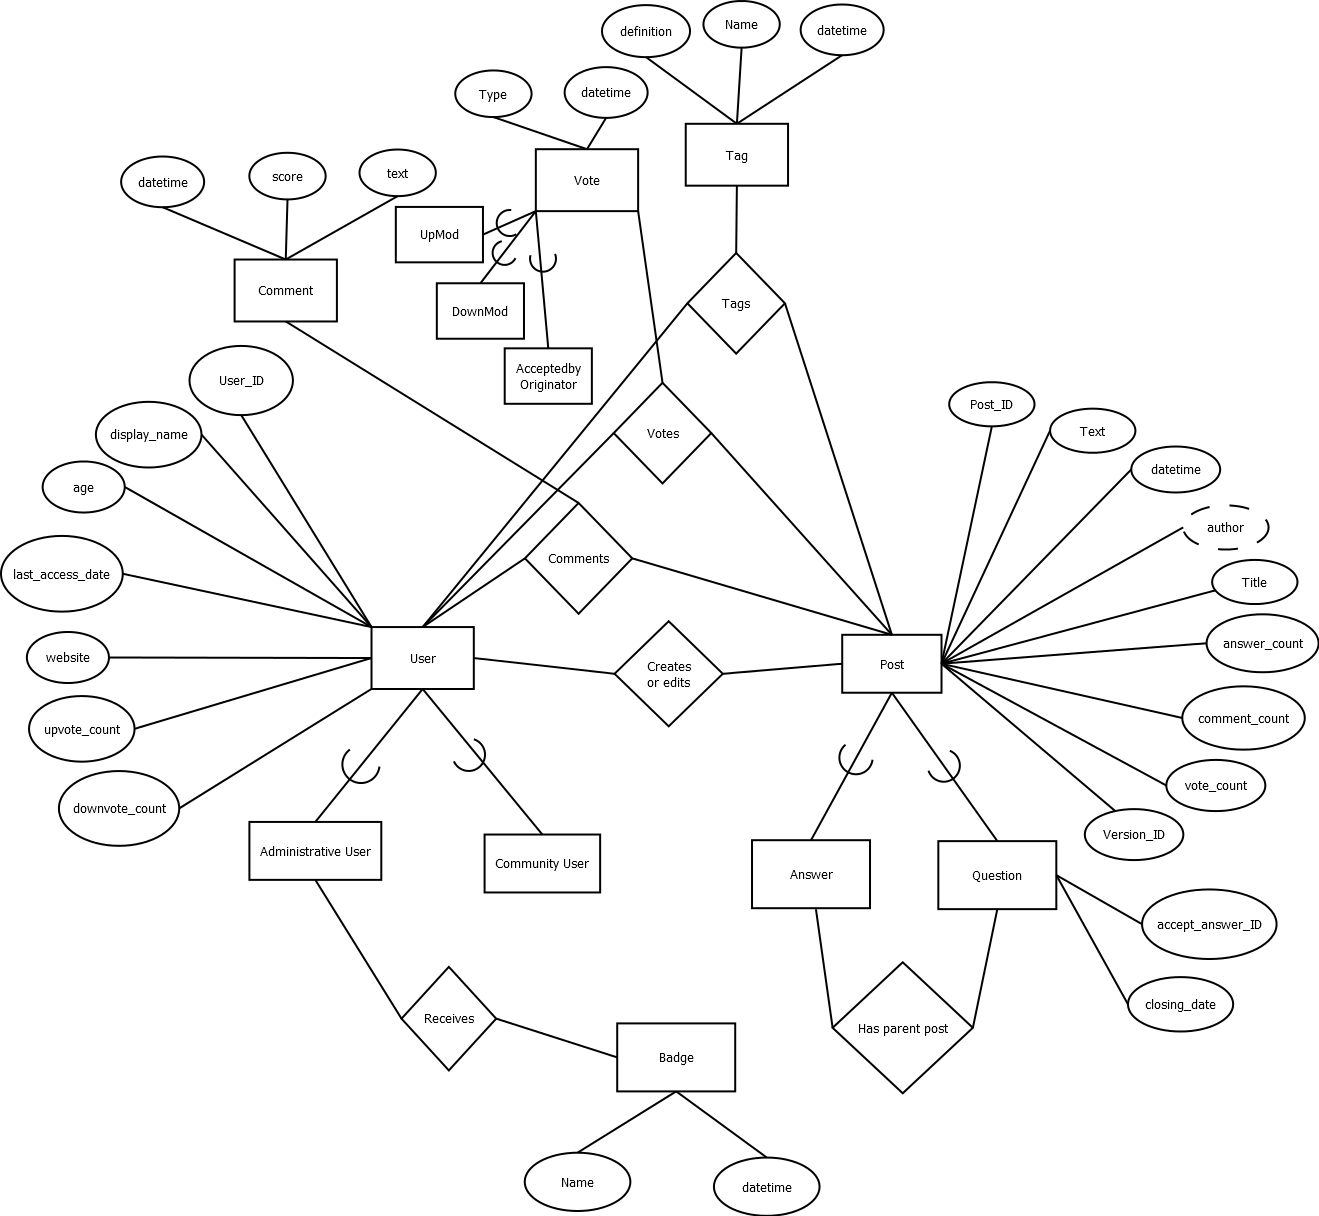

In [17]:
from IPython.display import Image
Image(filename="isi5.png")

### Multiplicities, Keys, and Weak Entity Sets.

Administering Keys is easy enough. For <b>User</b> and <b>Post</b> they're simply the User_ID and the Post_ID. For <b>Comment and Vote</b> the story is a bit different. Using the datetime as a key is the most straightforward way to create a key, but it's entirely possible that different entities (for e.g. a Comment) were made at the same datetime. So I'll model them as weak entity sets referring to the User_ID to create a unique key for them. That means double-lined entity set boxes, double-lined relationship diamonds, and double lines going from the weak entity set to the relationship.

<b>Tags</b> can be seen as the same as votes or comments, but they're different in an important aspect. Every tag has a unique name, and can be applied to many posts. There's no need for a Weak Entity Set here. 

<b>Badge</b> should also be a Weak Entity Set. A Badge with the same name (for instance, a badge called 'Extreme Contributor') can be awarded to several different Admins. Using datetime gives the same problems as with Comment, Vote, and Tag. So the full key of a badge should be its name and the Admin it is awarded to, given that an Admin cannot receive multiple badges with the same Name.

The keys for the <b>subclasses of User, Post and Vote </b> have the same key as attributes. I could model them in as derived attributes, but it's pretty obvious that they share that key with their superclass. 

Then, for the multiplicities. 
<b> One-Many relationships </b>
* Comment (one) Comments on (many) Posts
* Vote (one) votes on (many) Posts
* Answer (one) has parent post (many) Questions

Comments and votes are unique to a specific post. A vote by a user on a datetime can only apply to one Post. but a Post can have many votes. An answer post only answers to one question post, but a Question post can have many answer posts. 

<b> Many-Many relationships </b>
* User creates or edits Post
* Admin receives Badge
* User Comments on Post
* User Votes on Post
* User Tags Post
* Tag Tags Post

So, to present to you the final ER model:
# Final ER model:

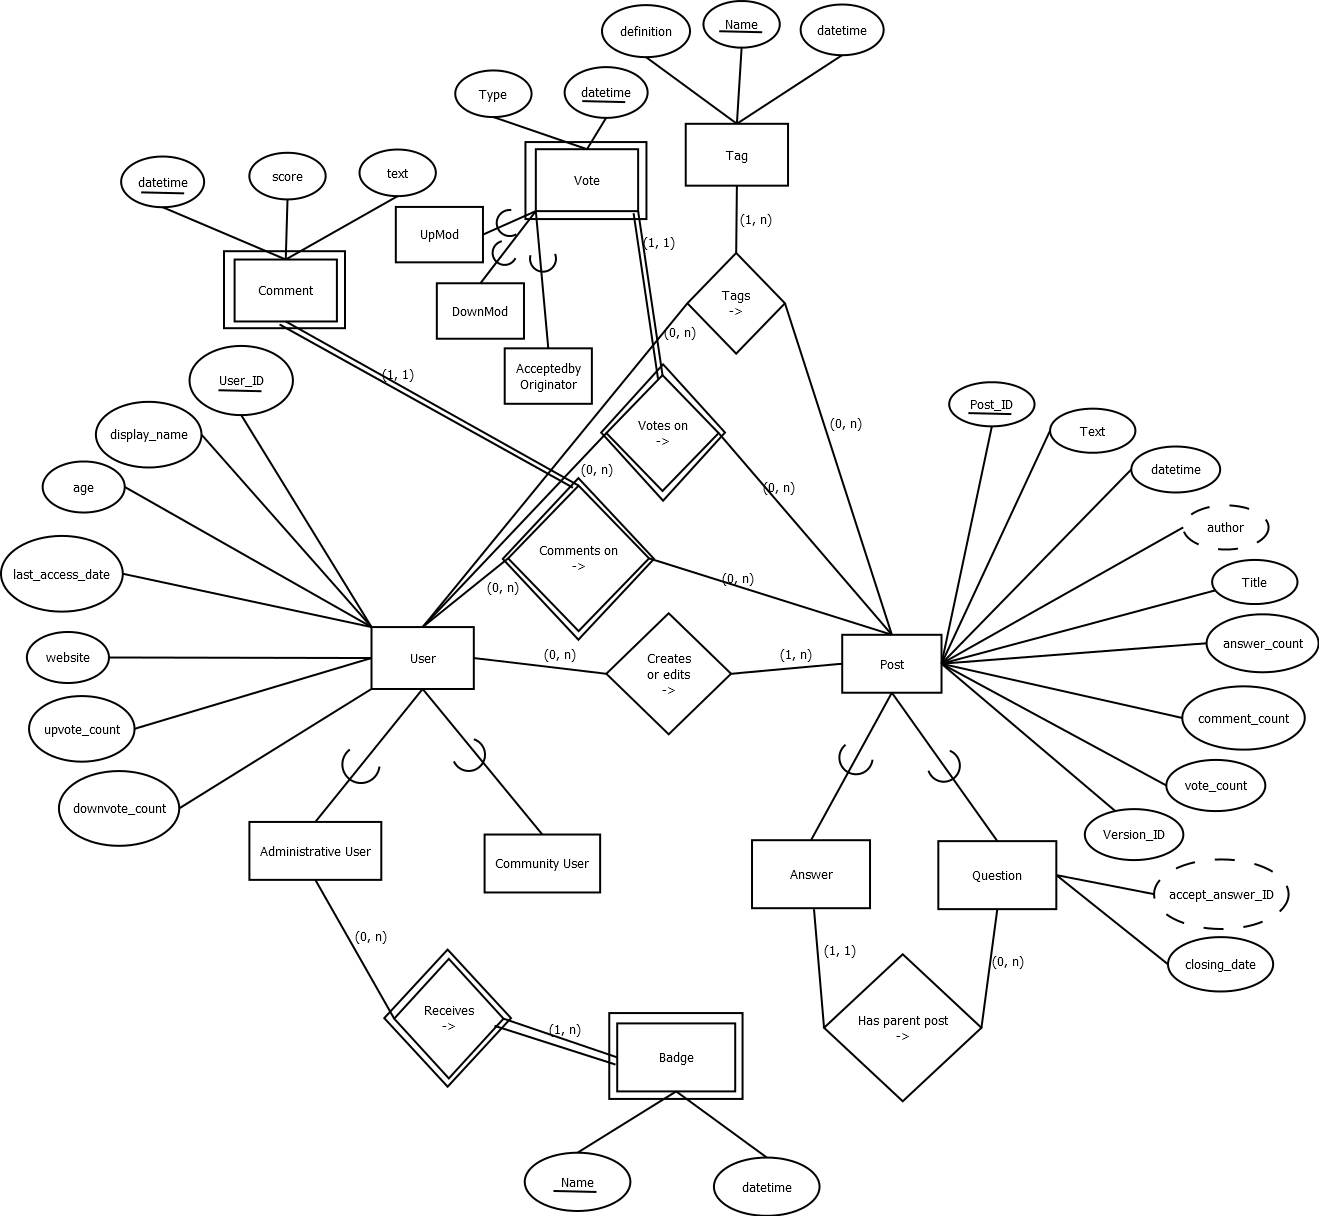

In [18]:
from IPython.display import Image
Image(filename="isi7.png")